In [4]:
print("Hello world")

Hello world


# Head
## Heading
### subsection
Regular text
**Bold**
*italic*
- bullet 1
- bullet 2
ai, big data

Now let's try the example we mentioned during the lecture. 

The training data contain some example measurements of the profit gained by opening an outlet in the cities with the population ranging between 30,000 and 100,000. The y-values are the profit measured in USD, and the x-values are the populations of the city. Each city population and profit tuple constitutes one training example in training dataset.

x = [6.4862, 5.5277, 8.5186, 7.0032]

y = [6.5987, 9.1302, 13.662, 11.854]

In [ ]:
import numpy as np
# initialize parameters
b = 0
m = 0

# set learning rate
learning_rate = 0.02

# set number of iterations
num_iterations = 20000

# define dataset
x = np.array([6.4862, 5.5277, 8.5186, 7.0032])
y = np.array([6.5987, 9.1302, 13.662, 11.854])

# perform gradient descent  
for i in range(num_iterations):
    J = 0.5/len(x)*sum(np.power(m*x + b - y, 2))
    print("Iteration: {}, m: {}, b: {}, J: {}".format(i, m, b, J))
    y_pred = m*x + b
    D_m = (-1/len(x)) * sum(x * (y - y_pred))
    D_b = (-1/len(x)) * sum(y - y_pred)
    m = m - learning_rate * D_m
    b = b - learning_rate * D_b


Iteration: 0, m: 0, b: 0, J: 56.75886921625
Iteration: 1, m: 1.4633327024, b: 0.2062245, J: 1.6551328206480285
Iteration: 2, m: 1.477101462477176, b: 0.20685505853262162, J: 1.6502968834487282
Iteration: 3, m: 1.477411352680592, b: 0.2055773436603053, J: 1.6502108762923344
Iteration: 4, m: 1.477596195082597, b: 0.2042825178670643, J: 1.6501253595197176
Iteration: 5, m: 1.4777797904219843, b: 0.20298813976504368, J: 1.650039923624778
Iteration: 6, m: 1.4779632881936344, b: 0.20169437209412966, J: 1.6499545684957928
Iteration: 7, m: 1.4781466991109302, b: 0.20040121607867978, J: 1.6498692940564126
Iteration: 8, m: 1.478330023313978, b: 0.19910867144356198, J: 1.6497841002303537
Iteration: 9, m: 1.4785132608446936, b: 0.1978167378998572, J: 1.649698986941412
Iteration: 10, m: 1.4786964117440633, b: 0.19652541515865393, J: 1.6496139541134518
Iteration: 11, m: 1.4788794760530442, b: 0.19523470293117584, J: 1.6495290016704096
Iteration: 12, m: 1.479062453812575, b: 0.1939446009287833, J: 1.6

mean squared error:  0.1137413769325341
R2 score:  0.8565656779573378


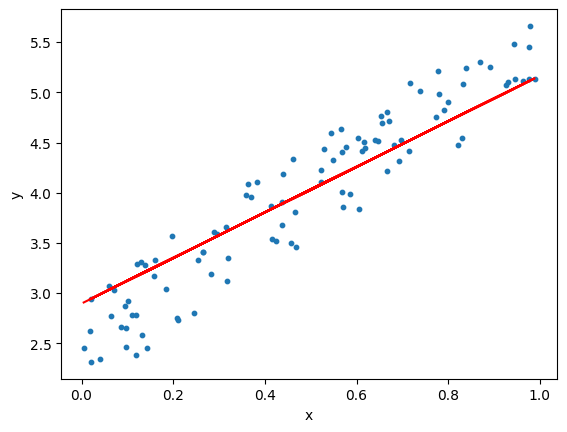

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

class LinearRegressionUsingGD:
    """Linear Regression Using Gradient Descent.
    Parameters
    ----------
    eta : float
        Learning rate
    n_iterations : int
        No of passes over the training set
    Attributes
    ----------
    w_ : weights/ after fitting the model
    bias_ : bias / after fitting the model
    cost_ : total error of the model after each iteration
    """

    def __init__(self, eta=0.05, n_iterations=10000):
        self.eta = eta
        self.n_iterations = n_iterations

    def fit(self, x, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """

        self.cost_ = []
        self.w_ = np.zeros((x.shape[1], 1))
        self.bias_ = np.zeros((1, 1))
        m = x.shape[0]

        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w_) + self.bias_
            residuals = y_pred - y
            gradient_vector_weight = np.dot(x.T, residuals)
            gradient_vector_bias = np.sum(residuals) 
            self.w_ -= (self.eta / m) * gradient_vector_weight
            self.bias_ -= (self.eta / m) * gradient_vector_bias
            cost = np.sum((residuals ** 2)) / (2 * m)
            self.cost_.append(cost)
        return self

    def predict(self, x):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        return np.dot(x, self.w_) + self.bias_
    
    
def run():
    # generate random data-set
    np.random.seed(0)
    x = np.random.rand(100, 1)
    y = 2 + 3 * x + np.random.rand(100, 1)
    
    # Model Initialization
    model = LinearRegressionUsingGD(0.02,500)
    # Fit the data (train the model)
    model.fit(x, y)
    #model = LinearRegression().fit(x, y)
    
    # Predict
    y_pred = model.predict(x)
    #print('predicted response:', y_pred, sep='\n')
    
    
    # model evaluation
    rmse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('mean squared error: ', rmse)
    print('R2 score: ', r2)
    
    # plot
    plt.scatter(x,y,s=10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x, y_pred, color='r')
    plt.show()
    
    
if __name__ == '__main__':
    model = LinearRegressionUsingGD()
    run()